In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
image_path = './IMAGE_DATA/Flowers/620.jpg'

## Task: Read and Display an Image with Matplotlib

- Import matplotlib.pyplot and matplotlib.image.
- Read an image from the example path 'example/path/to/image.jpg'.
- Print the shape of the image.
- Display the image using Matplotlib's imshow function.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

[matplotlib image module api refrence](https://matplotlib.org/stable/api/image_api.html)

In [4]:
#read image from a file into an array
img = mpimg.imread(image_path)

In [5]:
#three dimensional array, with MxNx3(RGB)
#256 rows 384 column of array with each array representing the value of RGB
img.shape

(256, 384, 3)

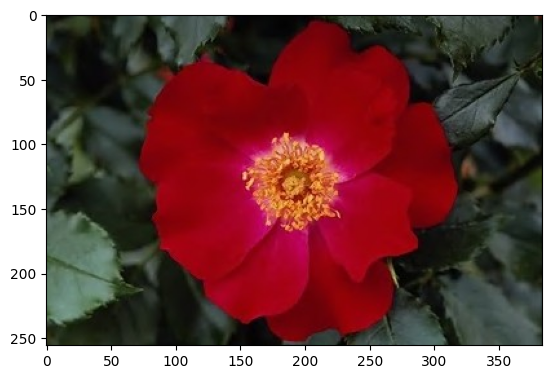

In [6]:
plt.imshow(img)
# plt.axis('off')

## Task: Tint and Resize an Image with Scipy

- Import numpy, scipy.misc, and matplotlib.pyplot.
- Read an image from the example path 'example/path/to/image.jpg' into a numpy array.
- Apply a tint to the image by scaling the color channels with [1, 0.95, 0.9].
- Resize the tinted image to 300x300 pixels using imresize.
- Save the tinted and resized image to 'example/path/to/tinted_image.jpg'.
- Display the original and tinted images side by side using Matplotlib.

In [7]:
# scipy.misc deprecated
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

org_img = plt.imread(image_path)

In [8]:
#shape and type of the original image
print(org_img.shape)
print(type(org_img))

(256, 384, 3)
<class 'numpy.ndarray'>


Element-wise multiplication multiplies corresponding elements of the arrays. This requires the two arrays to have the same shape or be broadcastable to a common shape. Here `tint_factors` will be broadcasted to the shape of (1,1,3).

use of uint8 vs int8 

The "u" in "uint" is short for "unsigned", meaning the integer doesn't have a sign (it can't be negative).

Signed 8 bit integers values go from -128 to +127, while unsigned go from 0 to 255 : The classic "byte"

In [18]:
#apply tint to the image

@interact(r=(0,1,0.05),g=(0,1,0.05,),b=(0,1,0.05))
def gen(r=1,g=0.95,b=.9):
    tint_factors = np.array([r,g,b])
    tinted_image_arr = org_img * tint_factors

    # print(f'Shape of the tinted array {tinted_image_arr.shape}')
    #within the valid 0,255 range and conversion to the required type
    # print('before type conversion',tinted_image_arr)

    tinted_image_arr = tinted_image_arr.astype(np.uint8)
    # print('after type conversion',tinted_image_arr)
    plt.imshow(tinted_image_arr)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='r', max=1.0, step=0.05), FloatSlider(value=0.95, des…

In [27]:
#save the tinted image
plt.imsave('./saved_image/tinted_flower_620.jpg',tinted_image_arr)

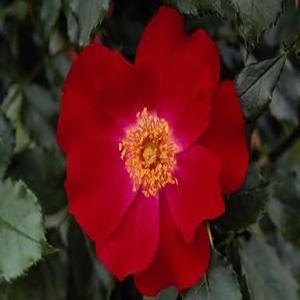

In [31]:
#resize the image
tinted_image = Image.open('./saved_image/tinted_flower_620.jpg')
resized_tinted_image = tinted_image.resize((300,300))
resized_tinted_image.show()

In [32]:
#save the resized and tinted iamge
resized_tinted_image.save('./saved_image/reshized_tinted_flower_620.jpg')

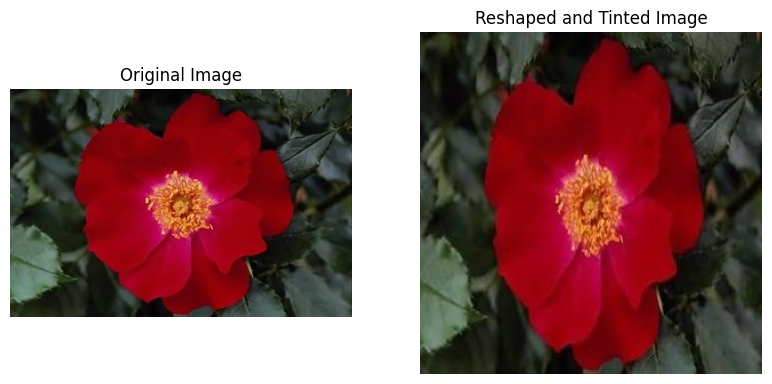

In [37]:
org_img = plt.imread(image_path)
changed_img = plt.imread('./saved_image/reshized_tinted_flower_620.jpg')
#org vs reshizedandtinted image
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(org_img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Reshaped and Tinted Image')
plt.imshow(changed_img)
plt.axis('off')

plt.show()


## Task: Display an Image with Different Interpolation Methods in Matplotlib

- Import matplotlib.pyplot and matplotlib.image.
- Read an image from the example path 'example/path/to/image.jpg'.
- Display the image using the following interpolation methods: 'none', 'nearest','bilinear', 'bicubic', 'spline16', and 'lanczos'.
- Create subplots to show the image with each interpolation method, labeling each subplot with the method name.

[code source](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html)

In [3]:
import matplotlib.pyplot as plt

org_img = plt.imread(image_path)

Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.547727,0.653529;0.352273x0.226471)
Axes(0.125,0.381765;0.352273x0.226471)
Axes(0.547727,0.381765;0.352273x0.226471)
Axes(0.125,0.11;0.352273x0.226471)
Axes(0.547727,0.11;0.352273x0.226471)


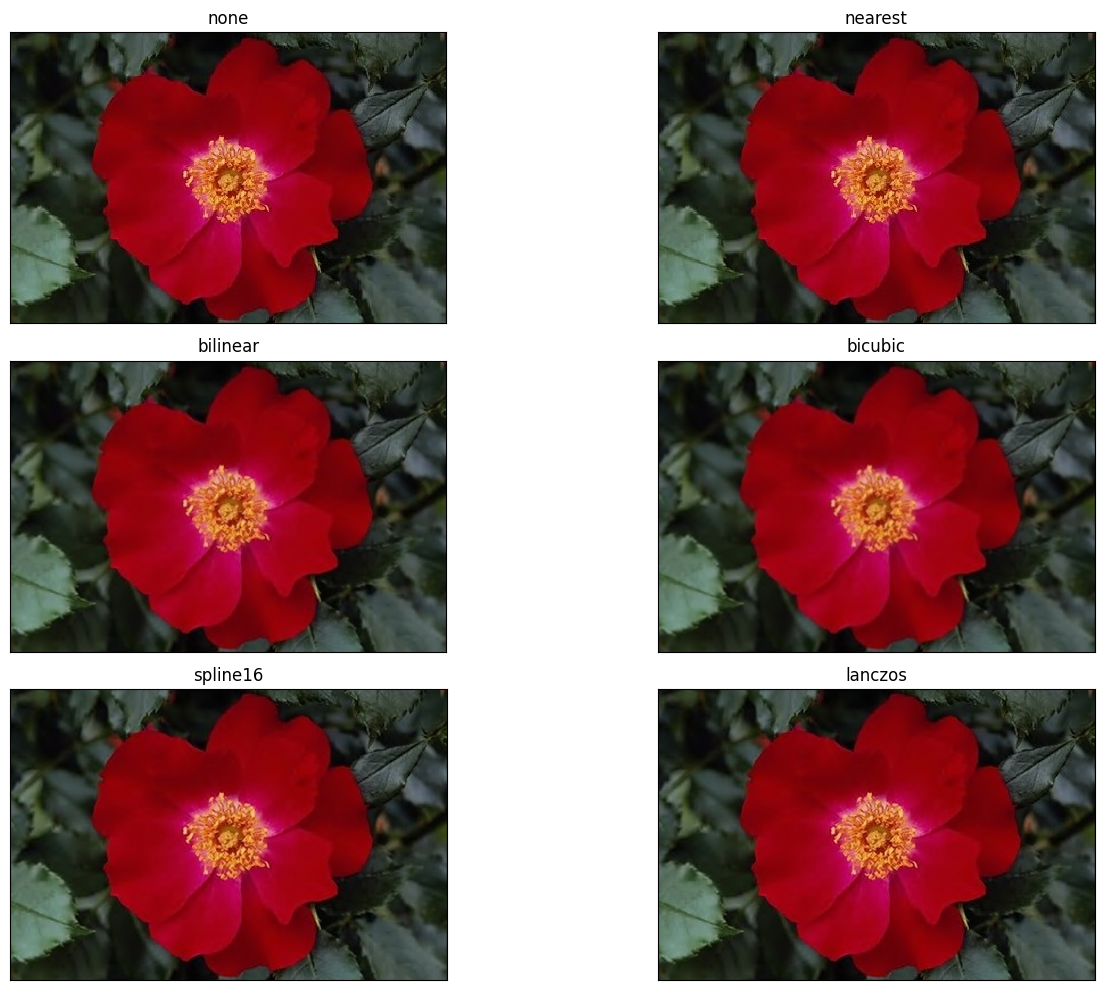

In [21]:
# methods = [None, 'none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 
#            'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 
#            'mitchell', 'sinc', 'lanczos', 'blackman']
methods = ['none','nearest','bilinear','bicubic','spline16','lanczos']


fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10),subplot_kw={'xticks':[],'yticks':[]})

for ax,interpolation_method in zip(axs.flat,methods):
    ax.imshow(org_img,interpolation=interpolation_method)
    ax.set_title(str(interpolation_method))

plt.tight_layout()
plt.show()

## Task: Convert a Color Image to Grayscale and Display Both Images Using PIL

- Import PIL.Image.
- Open a color image from the example path 'example/path/to/image.jpg'.
- Print the width, height, mode, format, and type of the image.
- Convert the color image to grayscale.
- Display both the original and grayscale images.

In [32]:
import PIL.Image as Image
org_img = Image.open(image_path)

In [33]:
print(f'Image Format: {org_img.format}')
print(f'Image Mode: {org_img.mode}')
print(f'Image Width: {org_img.width}')
print(f'Image Height: {org_img.height}')
#width and height -> tuple .size
print(f'Image Size in tuple form: {org_img.size}')

Image Format: JPEG
Image Mode: RGB
Image Width: 384
Image Height: 256
Image Size in tuple form: (384, 256)


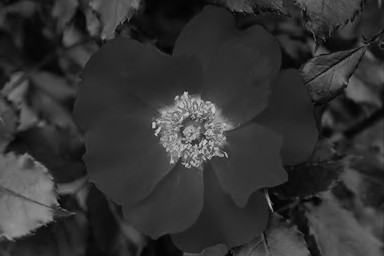

In [34]:
#grayscale conversion
grayscale_image = org_img.convert('L')
grayscale_image

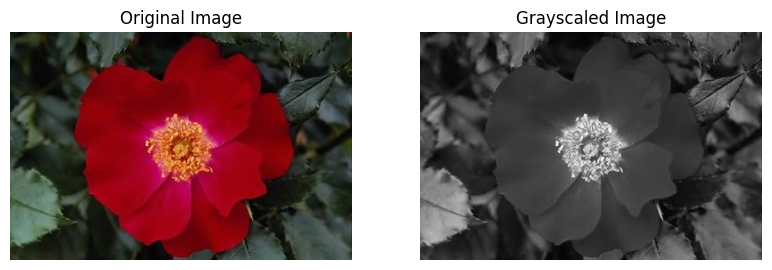

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(org_img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Grayscaled Image')
plt.imshow(grayscale_image,cmap='gray')
plt.axis('off')

plt.show()

## Task: Darken an Image by Applying a Factor to Each Pixel's Value Using PIL

- Import PIL.Image.
- Open an image from the example path 'example/path/to/image.jpg'.
- Apply a lambda function to multiply each pixel value by 0.3 to darken the image
- Display the darkened image.

In [19]:
import PIL.Image as Image
import numpy as np
org_img = Image.open(image_path)

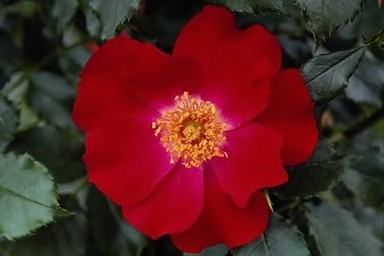

In [20]:
display(org_img)

In [22]:
@interact(darkening_factor = (0,1,0.05))
def gen_darkened_image(darkening_factor=0.3):
    darkened_image = org_img.point(lambda pixel : pixel * darkening_factor)
    display(darkened_image)

interactive(children=(FloatSlider(value=0.3, description='darkening_factor', max=1.0, step=0.05), Output()), _…

## Task: Read and Display an Image Using OpenCV

- Import cv2.
- Read an image from the example path 'example/path/to/image.jpg'.
- Display the image in a window using OpenCV's imshow function.
- Wait for a key press to close the window using cv2.waitKey(0) and cv2.destroyAllWindows().

In [11]:
import cv2 as cv
org_img = cv.imread(image_path)

cv.imshow("Display window", org_img)
k = cv.waitKey(0)
cv.destroyAllWindows()

## Task: Image Manipulation and Display using Pillow and Matplotlib

Objective: Perform various image manipulation and display tasks using the Pillow and Matplotlib libraries.

#### Load and Display an Image with Pillow

- Import the PIL.Image module.
- Load an image from the example path 'example/path/to/image.jpg'.
- Print the image's format, mode, and size.
- Display the image using the show method.

In [31]:
import PIL.Image as Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
org_img = Image.open(image_path)

In [32]:
print(f'Image Format: {org_img.format}')
print(f'Image Mode: {org_img.mode}')
#width and height -> tuple .size
print(f'Image Size in tuple form: {org_img.size}')

Image Format: JPEG
Image Mode: RGB
Image Size in tuple form: (384, 256)


In [49]:
org_img.show(title='Image Using Show()')

#### Convert the Image to a Numpy Array and Back with Pillow

- Import numpy and use numpy.asarray to convert the Pillow image to a numpy array.
- Print the shape of the numpy array.
- Convert the numpy array back to a Pillow image using Image.fromarray.
- Print the format, mode, and size of the new Pillow image.

!!!explore `numpy.array` and `numpy.asarray`

In [18]:
org_img_arr = np.asarray(org_img)
print(f'Shape of the array {org_img_arr.shape}')

Shape of the array (256, 384, 3)


In [20]:
#conversion back to Image
convert_arr_to_img = Image.fromarray(org_img_arr)
print(f'Image Format: {convert_arr_to_img.format}')
print(f'Image Mode: {convert_arr_to_img.mode}')
#width and height -> tuple .size
print(f'Image Size in tuple form: {convert_arr_to_img.size}')

Image Format: None
Image Mode: RGB
Image Size in tuple form: (384, 256)


!!! why is format not saved?

When an image is opened from a file, only that instance of the image is considered to have the format. Copies of the image will contain data loaded from the file, but not the file itself, meaning that it can no longer be considered to be in the original format. So if `copy()` is called on an image, or another method internally creates a copy of the image, then any methods or attributes specific to the format will no longer be present. The `fp` (file pointer) attribute will no longer be present, and the format attribute will be None.

#### Load and Display an Image with Matplotlib

- Import matplotlib.image and matplotlib.pyplot.
- Load the image from the example path as a pixel array.
- Print the data type and shape of the pixel array.
- Display the image using Matplotlib's imshow function.

In [22]:
img = mpimg.imread(image_path)
print(f'Data Type: {type(img)}')
print(f'Shape: {img.shape}')

Data Type: <class 'numpy.ndarray'>
Shape: (256, 384, 3)


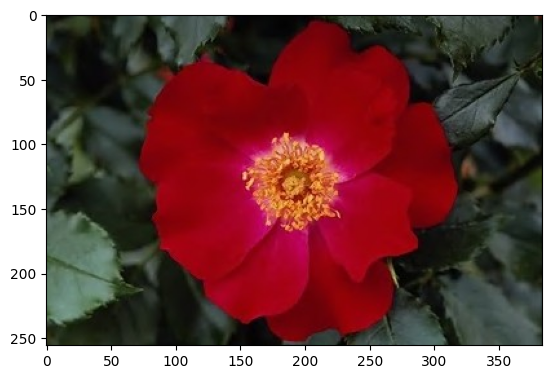

In [25]:
plt.imshow(img)

#### Load All Images in a Directory with Matplotlib

- Import os.listdir and matplotlib.image.
- Load all images from the example directory 'example/path/to/images/'.
- Print the filename and shape of each loaded image.

In [42]:
import os
directory_path = './IMAGE_DATA/Horses/'
images_list = os.listdir(directory_path)
print(f'FileName           Shape')

for image_name in images_list:
    curr_img = Image.open(f'{directory_path}/{image_name}')
    print(f'{image_name}        {np.asarray(curr_img).shape}')
    img.close()

FileName           Shape
horse-19.jpg        (194, 260, 3)
horse-13.jpg        (687, 1150, 3)
horse-9.jpg        (469, 540, 3)
horse-105.jpg        (259, 195, 3)
horse-110.jpg        (189, 267, 3)
horse-20.jpg        (168, 300, 3)
horse-128.jpg        (275, 183, 3)
horse-129.jpg        (254, 198, 3)
horse-7.jpg        (369, 500, 3)
horse-133.jpg        (264, 188, 3)
horse-2.jpg        (450, 487, 3)
horse-120.jpg        (194, 259, 3)
horse-4.jpg        (353, 236, 3)
horse-111.jpg        (238, 188, 3)
horse-1.jpg        (198, 236, 3)
horse-12.jpg        (115, 205, 3)
horse-126.jpg        (220, 229, 3)
horse-112.jpg        (208, 242, 3)
horse-18.jpg        (162, 311, 3)
horse-119.jpg        (192, 262, 3)
horse-127.jpg        (225, 225, 3)
horse-132.jpg        (183, 275, 3)
horse-6.jpg        (305, 457, 3)
horse-11.jpg        (182, 276, 3)
horse-118.jpg        (177, 284, 3)
horse-99.jpg        (194, 259, 3)
horse-16.jpg        (683, 1024, 3)
horse-17.jpg        (1080, 1920, 3)
horse-108.jp

#### Save an Image in a Different Format with Pillow

- Load the image from the example path.
- Save the image in PNG format to 'example/path/to/image.png'.
- Load and print the format of the saved image to verify.

In [46]:
org_img = Image.open(image_path)
org_img.save('./saved_image/diff_format.png',format='png')

In [47]:
diff_format_img = Image.open('./saved_image/diff_format.png')
print(f'Image Format: {diff_format_img.format}')
print(f'Image Mode: {diff_format_img.mode}')
#width and height -> tuple .size
print(f'Image Size in tuple form: {diff_format_img.size}')

Image Format: PNG
Image Mode: RGB
Image Size in tuple form: (384, 256)


#### Resize and Create a Thumbnail of an Image with Pillow

- Load the image from the example path.
- Print the original size of the image.
- Create a thumbnail of the image with a maximum size of 100x100 pixels.
- Print the size of the thumbnail.
- Resize the image to 200x200 pixels and print the new size.

In [48]:
org_img = Image.open(image_path)

In [50]:
#origiinal size of the image
print(f'original image size {org_img.size}')

original image size (384, 256)


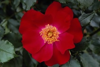

In [51]:
thumbnail_size = 100,100
org_img_copy = org_img.copy()
org_img_copy.thumbnail(size=thumbnail_size)
display(org_img_copy)

In [52]:
#size of the thumbnail
print(f'Thubnail Size {org_img_copy.size}')

Thubnail Size (100, 67)


This method calculates an appropriate thumbnail size to preserve the aspect of the image, 

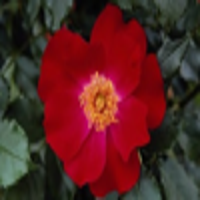

In [59]:
#thubnail resize to new size of 200 by 200
thumbnail_resized = org_img_copy.resize(size=(200,200))
display(thumbnail_resized)

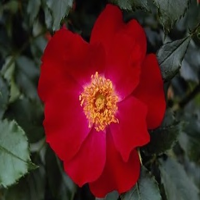

In [60]:
#original image resized to 200 by 200
org_resized = org_img.resize(size=(200,200))
display(org_resized)

#### Flip an Image Horizontally and Vertically with Pillow

- Load the image from the example path.
- Create horizontal and vertical flipped versions of the image.
- Display the original, horizontal flip, and vertical flip using Matplotlib.

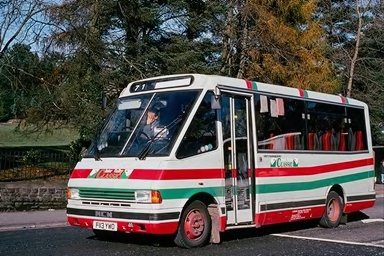

In [63]:
org_img = Image.open('./IMAGE_DATA/Buses/369.jpg')
display(org_img)

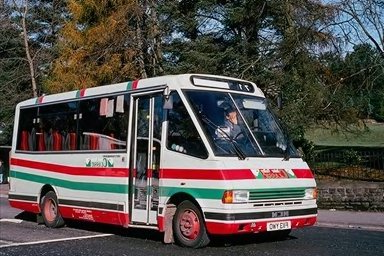

In [64]:
#horizontal flip
horizontal_flip = org_img.transpose(method=Image.Transpose.FLIP_LEFT_RIGHT)
display(horizontal_flip)

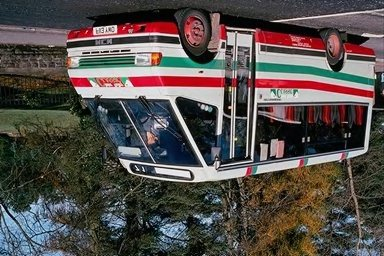

In [65]:
#vertical flip
vertical_flip = org_img.transpose(method=Image.Transpose.FLIP_TOP_BOTTOM)
display(vertical_flip)

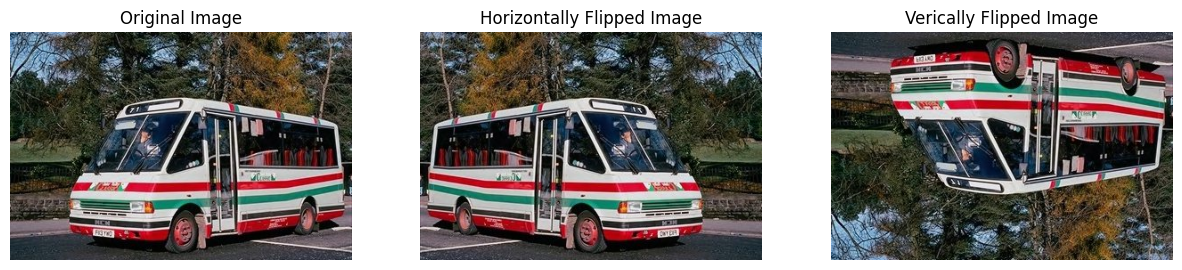

In [66]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(org_img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Horizontally Flipped Image')
plt.imshow(horizontal_flip)
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Verically Flipped Image')
plt.imshow(vertical_flip)
plt.axis('off')

plt.show()

#### Rotate an Image with Pillow

- Load the image from the example path.
- Display the original image.
- Rotate the image by 45 degrees and display it.
- Rotate the image by 90 degrees and display it.

In [67]:
org_img = Image.open('./IMAGE_DATA/Buses/369.jpg')

In [74]:
#rotates in counter clockwise direction
#expand -> expands the output to make it large enough to hold the rotated image
img_by_45_expand = org_img.rotate(angle=45,expand=1)
img_by_45 = org_img.rotate(angle=45)


In [69]:
img_by_90 = org_img.rotate(angle=90)

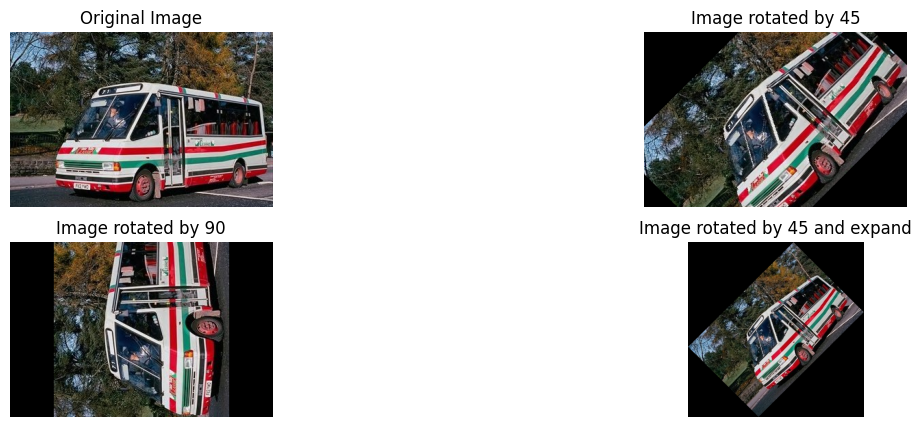

In [78]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(org_img)
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Image rotated by 45')
plt.imshow(img_by_45)
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Image rotated by 90')
plt.imshow(img_by_90)
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Image rotated by 45 and expand')
plt.imshow(img_by_45_expand)
plt.axis('off')

plt.show()

#### Crop an Image with Pillow

- Load the image from the example path.
- Crop the image to a 100x100 pixel square starting at coordinates (100, 100).
- Display the cropped image.

In [80]:
org_img = Image.open(image_path)

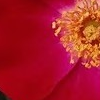

In [82]:
#cropped image
(left, upper, right, lower) = (100,100,200,200)
cropped_img = org_img.crop((left, upper, right, lower))
display(cropped_img)